# WeatherPy
----

#### Observable Trends
1. Unsurprisingly, temperature increases as we approach the equator (0 degrees latitude) then decreases as we move away from it. 
2. Interestingly, there are few cities right before hitting the equator that have higher tempretures. These few cities may be outliers or maybe some other factor like elevation is affecting these cities' tempretures? Reference Latitude vs. Tempreture plot.
3. There is no discernable relationship between Latitude and Cloudiness 
4. Regardless of Latitude, most cities have wind speeds less than 15 mph.
5. Looks like there is a small relationship between 50-80 degrees latitude and high humidity. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Starting URL for Weather Map API Call
url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=' + api_key

In [4]:
#Set up lists and counter for the loop
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
record_counter = 1

#Set up print statement to match hw example solution
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loopy loop through cities with a try/except to account for errors
for city in cities:  
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record_counter} | {city_record}")
        print(f"{url}&q={city}")
        record_counter = record_counter + 1
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Pandan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=350baa2220b725af88e91edbf6ad2b63&q=pandan
Processing Record 2 | Banyuwangi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=350baa2220b725af88e91edbf6ad2b63&q=banyuwangi
Processing Record 3 | Vaini
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=350baa2220b725af88e91edbf6ad2b63&q=vaini
Processing Record 4 | Ribeira Grande
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=350baa2220b725af88e91edbf6ad2b63&q=ribeira grande
Processing Record 5 | Mount Gambier
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=350baa2220b725af88e91edbf6ad2b63&q=mount gambier
Processing Record 6 | Airai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=350baa2220b725af88e91edbf6ad2b63&q=airai
Processing Record 7 | Oil City
http://api.openweathermap.org/data/2.5/weath

Processing Record 61 | Pyay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=350baa2220b725af88e91edbf6ad2b63&q=pyay
Processing Record 62 | Talnakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=350baa2220b725af88e91edbf6ad2b63&q=talnakh
Processing Record 63 | Bilibino
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=350baa2220b725af88e91edbf6ad2b63&q=bilibino
Processing Record 64 | Eyl
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=350baa2220b725af88e91edbf6ad2b63&q=eyl
Processing Record 65 | Kirakira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=350baa2220b725af88e91edbf6ad2b63&q=kirakira
Processing Record 66 | Koryukivka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=350baa2220b725af88e91edbf6ad2b63&q=koryukivka
Processing Record 67 | Port-Gentil
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=350baa2220b725af88e91edbf6ad2b63&q=port-gentil
Pr

Processing Record 118 | Port Lincoln
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=350baa2220b725af88e91edbf6ad2b63&q=port lincoln
Processing Record 119 | Bethel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=350baa2220b725af88e91edbf6ad2b63&q=bethel
City not found. Skipping...
Processing Record 120 | Marrakesh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=350baa2220b725af88e91edbf6ad2b63&q=marrakesh
Processing Record 121 | Amahai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=350baa2220b725af88e91edbf6ad2b63&q=amahai
Processing Record 122 | Dingzhou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=350baa2220b725af88e91edbf6ad2b63&q=dingzhou
Processing Record 123 | Chekhov
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=350baa2220b725af88e91edbf6ad2b63&q=chekhov
City not found. Skipping...
Processing Record 124 | Santa Eulalia
http://api.openweathermap.org/data/2

Processing Record 173 | Pangnirtung
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=350baa2220b725af88e91edbf6ad2b63&q=pangnirtung
Processing Record 174 | Mezen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=350baa2220b725af88e91edbf6ad2b63&q=mezen
Processing Record 175 | Thinadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=350baa2220b725af88e91edbf6ad2b63&q=thinadhoo
Processing Record 176 | Kloulklubed
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=350baa2220b725af88e91edbf6ad2b63&q=kloulklubed
Processing Record 177 | Manali
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=350baa2220b725af88e91edbf6ad2b63&q=manali
Processing Record 178 | Norman Wells
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=350baa2220b725af88e91edbf6ad2b63&q=norman wells
Processing Record 179 | Vila Velha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=350baa2220b725a

Processing Record 228 | Mahenge
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=350baa2220b725af88e91edbf6ad2b63&q=mahenge
City not found. Skipping...
Processing Record 229 | Cape Town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=350baa2220b725af88e91edbf6ad2b63&q=cape town
Processing Record 230 | Antofagasta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=350baa2220b725af88e91edbf6ad2b63&q=antofagasta
Processing Record 231 | Oistins
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=350baa2220b725af88e91edbf6ad2b63&q=oistins
Processing Record 232 | Abu Dhabi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=350baa2220b725af88e91edbf6ad2b63&q=abu dhabi
Processing Record 233 | El Tambo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=350baa2220b725af88e91edbf6ad2b63&q=el tambo
Processing Record 234 | Alugan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APP

Processing Record 285 | Cuamba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=350baa2220b725af88e91edbf6ad2b63&q=cuamba
Processing Record 286 | Hay River
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=350baa2220b725af88e91edbf6ad2b63&q=hay river
Processing Record 287 | Lufilufi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=350baa2220b725af88e91edbf6ad2b63&q=lufilufi
Processing Record 288 | Katsuura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=350baa2220b725af88e91edbf6ad2b63&q=katsuura
Processing Record 289 | Moron
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=350baa2220b725af88e91edbf6ad2b63&q=moron
City not found. Skipping...
Processing Record 290 | Candelaria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=350baa2220b725af88e91edbf6ad2b63&q=candelaria
Processing Record 291 | Port Hardy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=350

Processing Record 344 | Neryungri
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=350baa2220b725af88e91edbf6ad2b63&q=neryungri
Processing Record 345 | Zeya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=350baa2220b725af88e91edbf6ad2b63&q=zeya
Processing Record 346 | Cambridge
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=350baa2220b725af88e91edbf6ad2b63&q=cambridge
Processing Record 347 | Brae
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=350baa2220b725af88e91edbf6ad2b63&q=brae
Processing Record 348 | Christchurch
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=350baa2220b725af88e91edbf6ad2b63&q=christchurch
Processing Record 349 | Wladyslawowo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=350baa2220b725af88e91edbf6ad2b63&q=wladyslawowo
Processing Record 350 | Shache
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=350baa2220b725af88e91edbf6a

Processing Record 400 | Maceio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=350baa2220b725af88e91edbf6ad2b63&q=maceio
Processing Record 401 | Tianpeng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=350baa2220b725af88e91edbf6ad2b63&q=tianpeng
Processing Record 402 | Fomboni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=350baa2220b725af88e91edbf6ad2b63&q=fomboni
Processing Record 403 | Ukwa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=350baa2220b725af88e91edbf6ad2b63&q=ukwa
Processing Record 404 | Wuhan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=350baa2220b725af88e91edbf6ad2b63&q=wuhan
City not found. Skipping...
Processing Record 405 | Itarema
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=350baa2220b725af88e91edbf6ad2b63&q=itarema
Processing Record 406 | Mareeba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=350baa2220b725af88e91edb

City not found. Skipping...
City not found. Skipping...
Processing Record 457 | Valparaiso
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=350baa2220b725af88e91edbf6ad2b63&q=valparaiso
City not found. Skipping...
Processing Record 458 | Bloomington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=350baa2220b725af88e91edbf6ad2b63&q=bloomington
Processing Record 459 | Karasjok
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=350baa2220b725af88e91edbf6ad2b63&q=karasjok
Processing Record 460 | Cabo San Lucas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=350baa2220b725af88e91edbf6ad2b63&q=cabo san lucas
Processing Record 461 | Jega
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=350baa2220b725af88e91edbf6ad2b63&q=jega
Processing Record 462 | Julfa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=350baa2220b725af88e91edbf6ad2b63&q=culfa
Processing Record 463 | Khandyga
http:

Processing Record 512 | Maturin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=350baa2220b725af88e91edbf6ad2b63&q=maturin
Processing Record 513 | Dharmanagar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=350baa2220b725af88e91edbf6ad2b63&q=dharmanagar
Processing Record 514 | Muzhi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=350baa2220b725af88e91edbf6ad2b63&q=muzhi
Processing Record 515 | Altamont
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=350baa2220b725af88e91edbf6ad2b63&q=altamont
Processing Record 516 | Nome
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=350baa2220b725af88e91edbf6ad2b63&q=nome
Processing Record 517 | College
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=350baa2220b725af88e91edbf6ad2b63&q=college
Processing Record 518 | Kuryk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=350baa2220b725af88e91edbf6ad2b63&q=kuryk
Pro

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weather_dict)

# Display count of weather data values 
weather_data.count()

City          558
Cloudiness    558
Country       558
Date          558
Humidity      558
Lat           558
Lng           558
Max Temp      558
Wind Speed    558
dtype: int64

In [6]:
weather_data.to_csv('weather_data.csv')

# Display data frame head 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Pandan,66,PH,1575598313,77,11.72,122.09,81.97,7.23
1,Banyuwangi,35,ID,1575598313,65,-8.21,114.37,85.24,7.87
2,Vaini,75,IN,1575598313,93,15.34,74.49,64.40,4.70
3,Ribeira Grande,98,PT,1575598313,84,38.52,-28.70,56.98,4.97
4,Mount Gambier,75,AU,1575598313,72,-37.83,140.78,59.00,18.34


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

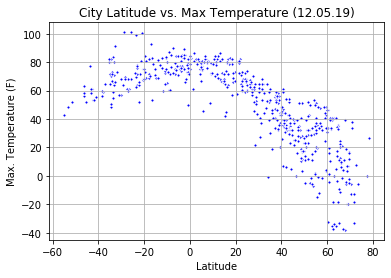

In [28]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10, color="blue", edgecolors='white')

#Make it pretty
plt.title("City Latitude vs. Max Temperature (12.05.19)")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Lat_v_MaxTemp.png")


#### Latitude vs. Humidity Plot

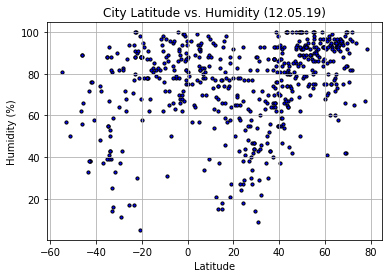

In [33]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10, color="blue", edgecolors='black')

#Make it pretty
plt.title("City Latitude vs. Humidity (12.05.19)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Lat_v_Humidity.png")


#### Latitude vs. Cloudiness Plot

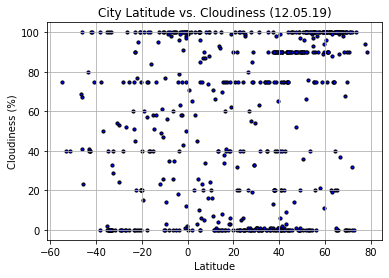

In [31]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10, color="blue", edgecolors='black')

#Make it pretty
plt.title("City Latitude vs. Cloudiness (12.05.19)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Lat_v_Cloudiness.png")


#### Latitude vs. Wind Speed Plot

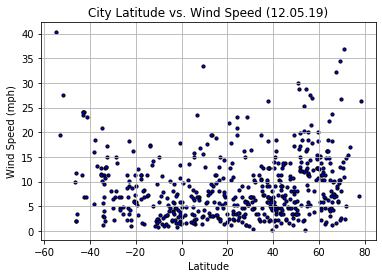

In [32]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10, color="blue", edgecolors='black')

#Make it pretty
plt.title("City Latitude vs. Wind Speed (12.05.19)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Lat_v_Wind.png")